In [ ]:
from sklearn.datasets import load_digits
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
digits = load_digits()
X = digits.data
y = digits.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
# finding the best value for k using gridsearchCV
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(KNeighborsClassifier(),{'n_neighbors':[1,3,20,100]},cv=5,return_train_score=False)
clf.fit(X_train,y_train)
clf.cv_results_

{'mean_fit_time': array([0.00074878, 0.00063396, 0.00087161, 0.00056829]),
 'std_fit_time': array([2.80278846e-04, 1.07305631e-04, 2.49593322e-04, 1.84330715e-05]),
 'mean_score_time': array([0.00296531, 0.00348544, 0.00492573, 0.00935779]),
 'std_score_time': array([0.00033253, 0.00135591, 0.00080658, 0.00011697]),
 'param_n_neighbors': masked_array(data=[1, 3, 20, 100],
              mask=[False, False, False, False],
        fill_value=999999),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 3},
  {'n_neighbors': 20},
  {'n_neighbors': 100}],
 'split0_test_score': array([0.98611111, 0.98958333, 0.96875   , 0.93055556]),
 'split1_test_score': array([0.98958333, 0.98611111, 0.97222222, 0.87847222]),
 'split2_test_score': array([0.99303136, 0.97909408, 0.95818815, 0.91637631]),
 'split3_test_score': array([0.99303136, 0.98954704, 0.96515679, 0.92334495]),
 'split4_test_score': array([0.97909408, 0.97909408, 0.95818815, 0.89198606]),
 'mean_test_score': array([0.98817025, 0.98468593, 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9888888888888889

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[30,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 49,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0,  0, 24]])

Text(95.72222222222221, 0.5, 'y_test')

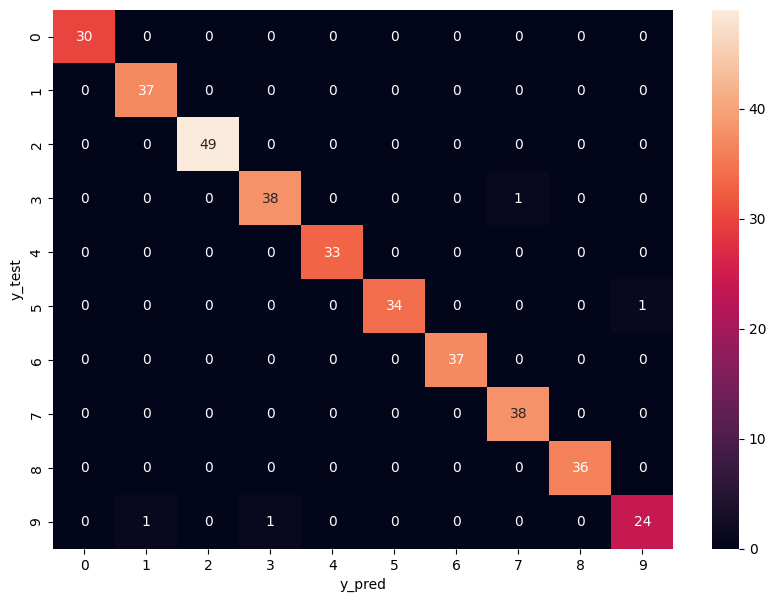

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('y_pred')
plt.ylabel('y_test')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.97      1.00      0.99        37
           2       1.00      1.00      1.00        49
           3       0.97      0.97      0.97        39
           4       1.00      1.00      1.00        33
           5       1.00      0.97      0.99        35
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        38
           8       1.00      1.00      1.00        36
           9       0.96      0.92      0.94        26

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

